In [2]:
### Music Algorithm
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

data = np.load("data.npz")
S = data['S']
Rx = S[0]
M = 24
D = 3
Omega = np.linspace(0, 2*np.pi, 1000)
def P(omega, v):
    e = np.array([np.exp(omega*k*1j) for k in range(M)])
    d2 = 0
    for vi in v:f
        d2+=np.linalg.norm(e.conjugate().T@vi)**2
    return 1/d2
def music(Rx):
    lamda, vecs = np.linalg.eig(Rx)
    idx = lamda.argsort()[::-1];
    vecs = vecs[idx]
    v = vecs[:M-D]
    val = -1
    Pmu = np.array([P(omega, v) for omega in Omega])
    return Omega[Pmu.argmax()]
music(Rx)

4.295711276079737

In [4]:
def music_all(S):
    res =[]
    for Rx in tqdm(S):
        res.append(music(Rx))
    return np.array(res)
res = music_all(S)
np.unique(res, return_counts=True)

100%|███████████████████████████████████████████████████████████████████████████████| 3595/3595 [11:04<00:00,  5.41it/s]


(array([0.        , 0.00628947, 0.01257895, 0.01886842, 0.0251579 ,
        0.03773685, 0.04402632, 0.0503158 , 0.05660527, 0.06289475,
        0.06918422, 0.0754737 , 0.08805265, 0.09434212, 0.10692107,
        0.11321055, 0.11950002, 0.1257895 , 0.13207897, 0.13836845,
        0.14465792, 0.15094739, 0.15723687, 0.16352634, 0.16981582,
        0.18239477, 0.20126319, 0.20755267, 0.22013162, 0.22642109,
        0.23271057, 0.23900004, 0.24528952, 0.25157899, 0.25786847,
        0.26415794, 0.27044742, 0.27673689, 0.28931584, 0.29560531,
        0.30189479, 0.30818426, 0.31447374, 0.32076321, 0.32705269,
        0.33334216, 0.33963164, 0.34592111, 0.35221059, 0.35850006,
        0.36478954, 0.37107901, 0.37736849, 0.38365796, 0.38994744,
        0.39623691, 0.40252639, 0.40881586, 0.41510534, 0.42139481,
        0.42768429, 0.43397376, 0.44026323, 0.44655271, 0.45284218,
        0.45913166, 0.46542113, 0.47800008, 0.48428956, 0.49057903,
        0.49686851, 0.50315798, 0.50944746, 0.51

#### Plot for the first one

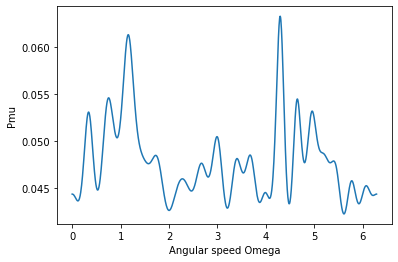

In [5]:
Rx = S[0]
lamda, vecs = np.linalg.eig(Rx)
idx = lamda.argsort()[::-1];
vecs = vecs[idx]
v = vecs[:M-D]
PP = np.array([P(omega, v) for omega in Omega])
plt.xlabel('Angular speed Omega')
plt.ylabel('Pmu')
plt.plot(Omega, PP)